In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_excel('train_modellhez.xlsx')
df_train.head()

,Unnamed: 0,AT,V,AP,RH,PE
0,0,10.54,34.03,1018.71,74.00,478.77
1,1,7.08,39.99,1010.55,91.44,482.83
2,2,14.49,41.16,1000.50,82.17,465.24
3,3,10.73,25.36,1009.35,100.15,469.43
4,4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
df_train = df_train.iloc[:, 1:]
df_train.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
df_test = pd.read_excel('Test.xlsx')
df_test.head()

,AT,V,AP,RH,PE
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [ ]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:, -1]
y_train

0       478.77
1       482.83
2       465.24
3       469.43
4       442.50
         ...  
8527    457.32
8528    446.92
8529    429.34
8530    421.57
8531    454.41
Name: PE, Length: 8532, dtype: float64

In [ ]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:, -1]
y_test

0      481.30
1      465.36
2      465.48
3      467.05
4      463.58
        ...  
995    439.20
996    460.53
997    458.26
998    440.88
999    457.05
Name: PE, Length: 1000, dtype: float64

Neurális hálózat

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test) #Így nem viszünk át akaratlanul információt a train-ről a test-re, mint ha csak scaler.transform-t használnánk
y_train_sc = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test_sc = scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [ ]:
X_train_sc.shape

(8532, 4)

In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [ ]:
# Build a Sequential model
model = tf.keras.Sequential()
model.add(Input(shape=(X_train_sc.shape[1],)))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                125       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='MeanSquaredError', optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history = model.fit(X_train_sc, y_train_sc, epochs=100, validation_split = 0.2)

Epoch 1/100
214/214 [==============================] - 1s 2ms/step - loss: 0.1685 - val_loss: 0.0714
Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 0.0644 - val_loss: 0.0665
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0619 - val_loss: 0.0649
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0644
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0601 - val_loss: 0.0646
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0600 - val_loss: 0.0638
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0623
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0590 - val_loss: 0.0621
Epoch 9/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0587 - val_loss: 0.0616
Epoch 10/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0584 - val_lo

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.050649,0.056138,95
96,0.050655,0.055888,96
97,0.050461,0.056300,97
98,0.050785,0.055743,98
99,0.050203,0.055219,99


In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()

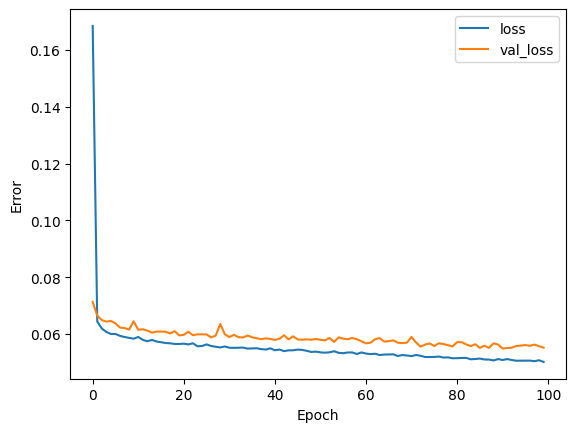

In [ ]:
plot_loss(history)

In [ ]:
model.evaluate(X_test_sc, y_test_sc)

32/32 [==============================] - 0s 937us/step - loss: 0.0511


0.05107714980840683

In [ ]:
nn_predict_test = model.predict(X_test_sc)

32/32 [==============================] - 0s 994us/step


In [ ]:
nn_predict_train = model.predict(X_train_sc)

267/267 [==============================] - 0s 879us/step


Text(0, 0.5, 'predikálty_teszt')

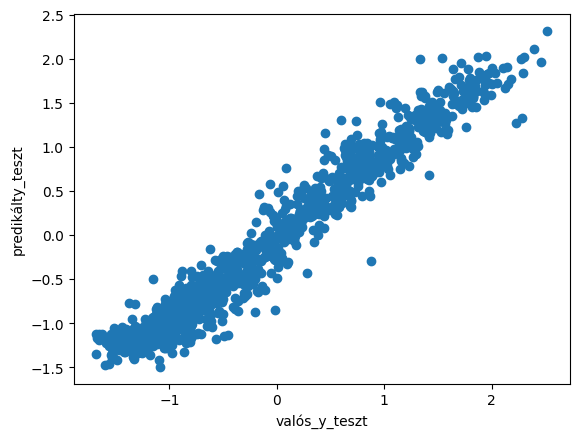

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test_sc, nn_predict_test)
plt.xlabel('valós_y_teszt')
plt.ylabel('predikálty_teszt')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE_train = mean_absolute_error(y_train_sc, nn_predict_train)
MAE_test = mean_absolute_error(y_test_sc, nn_predict_test)
print([MAE_train, MAE_test])

[0.16944736036603605, 0.1740065256462778]


In [ ]:
MSE_train = mean_squared_error(y_train_sc, nn_predict_train)
MSE_test = mean_squared_error(y_test_sc, nn_predict_test)
print([MSE_train, MSE_test])

[0.05030545606905465, 0.05107714763590323]


In [ ]:
r2_score(y_train_sc, nn_predict_train)

0.9496945439309453

In [ ]:
r2_score(y_test_sc, nn_predict_test)

0.9489228523640968

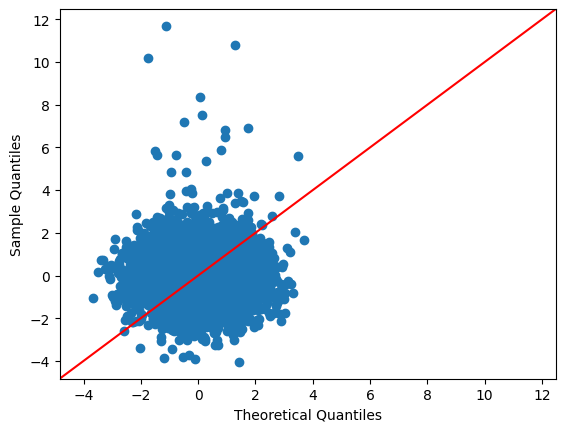

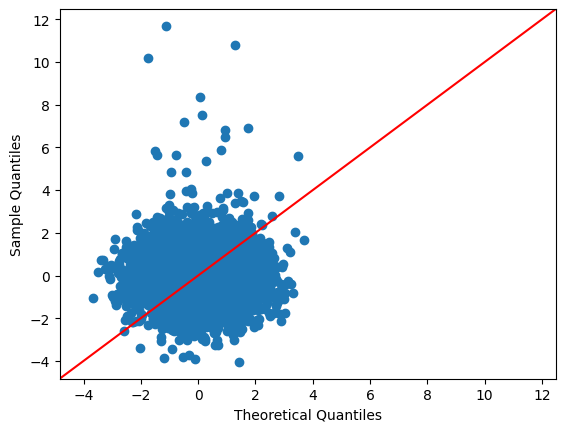

In [ ]:
import statsmodels.api as sm
error = nn_predict_train - y_train_sc
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

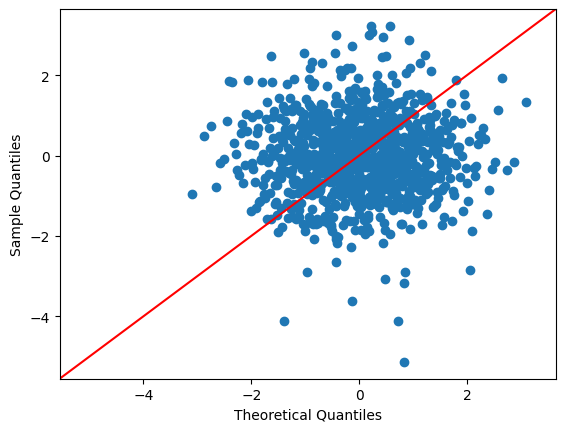

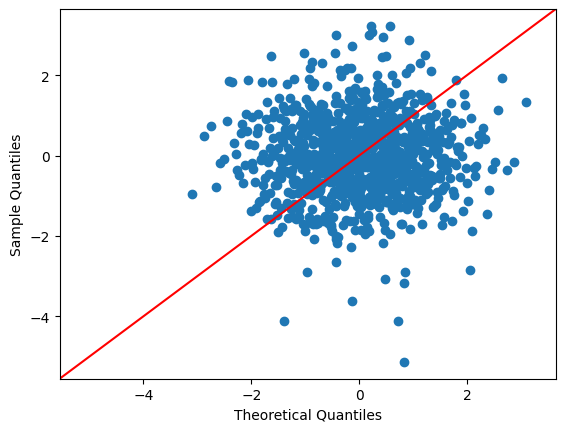

In [ ]:
error = nn_predict_test - y_test_sc
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

Sigmoid függvénnyel kevesebb rejtett réteggel

In [ ]:
model_sigm = tf.keras.Sequential()
model_sigm.add(Input(shape=(X_train_sc.shape[1],)))
model_sigm.add(Dense(1, activation='sigmoid'))
model_sigm.add(Dense(1, activation='sigmoid'))
model_sigm.add(Dense(1))

In [ ]:
model_sigm.compile(loss='MeanSquaredError', optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history = model_sigm.fit(X_train_sc, y_train_sc, epochs=100, validation_split = 0.2)

Epoch 1/100
214/214 [==============================] - 1s 2ms/step - loss: 0.9687 - val_loss: 0.9516
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.9255 - val_loss: 0.9062
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.8704 - val_loss: 0.8419
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 0.7946 - val_loss: 0.7585
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.7025 - val_loss: 0.6631
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: 0.6035 - val_loss: 0.5640
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: 0.5062 - val_loss: 0.4712
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: 0.4188 - val_loss: 0.3906
Epoch 9/100
214/214 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.3251
Epoch 10/100
214/214 [==============================] - 0s 2ms/step - loss: 0.2893 - val_lo

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.067318,0.071117,95
96,0.067212,0.071258,96
97,0.067140,0.071709,97
98,0.067168,0.071262,98
99,0.067162,0.071171,99


In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()

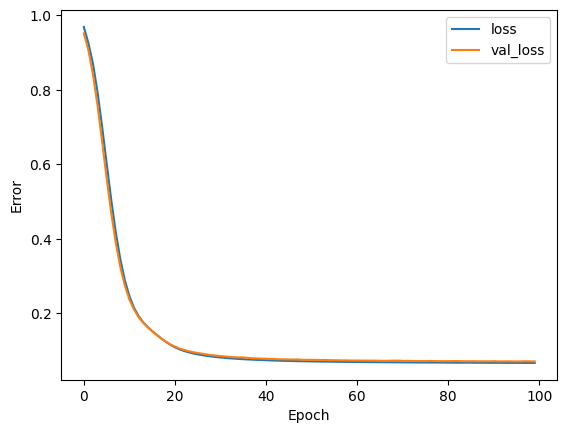

In [ ]:
plot_loss(history)

In [ ]:
nn_predict_test = model_sigm.predict(X_test_sc)

32/32 [==============================] - 0s 1ms/step


In [ ]:
nn_predict_train = model_sigm.predict(X_train_sc)

267/267 [==============================] - 0s 885us/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE_train = mean_absolute_error(y_train_sc, nn_predict_train)
MAE_test = mean_absolute_error(y_test_sc, nn_predict_test)
print([MAE_train, MAE_test])

[0.20306575974167218, 0.2041370978464765]


In [ ]:
MSE_train = mean_squared_error(y_train_sc, nn_predict_train)
MSE_test = mean_squared_error(y_test_sc, nn_predict_test)
print([MSE_train, MSE_test])

[0.06798166920575296, 0.06532497782678533]


In [ ]:
r2_score(y_train_sc, nn_predict_train)

0.932018330794247

In [ ]:
r2_score(y_test_sc, nn_predict_test)

0.9346750221732146

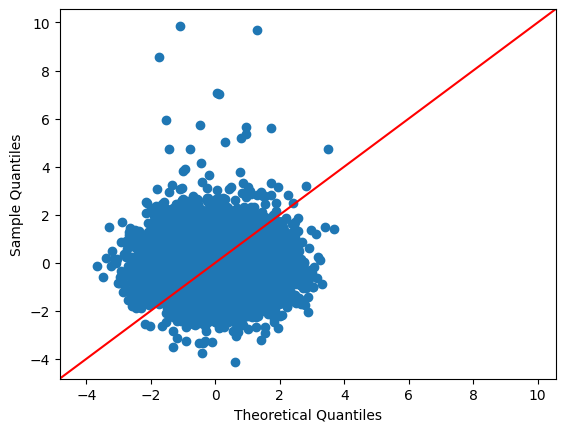

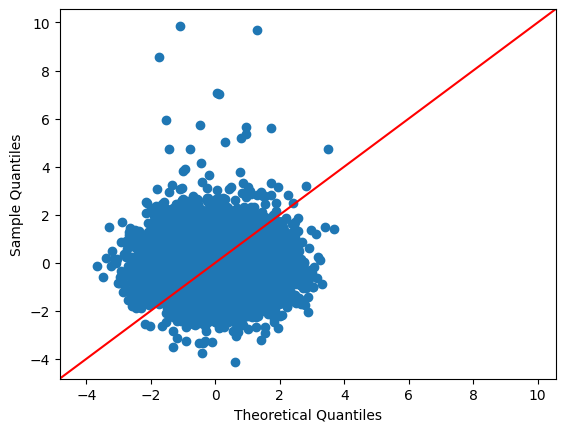

In [ ]:
import statsmodels.api as sm
error = nn_predict_train - y_train_sc
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')

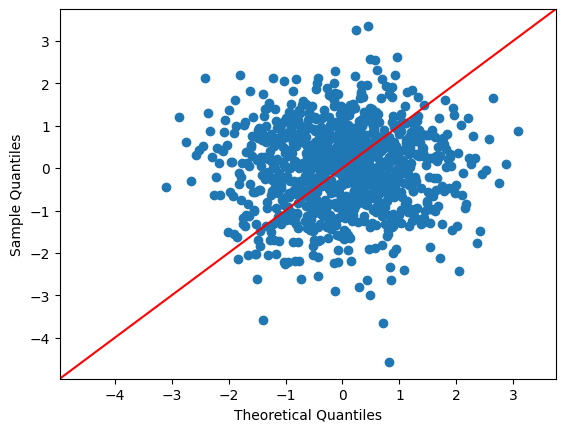

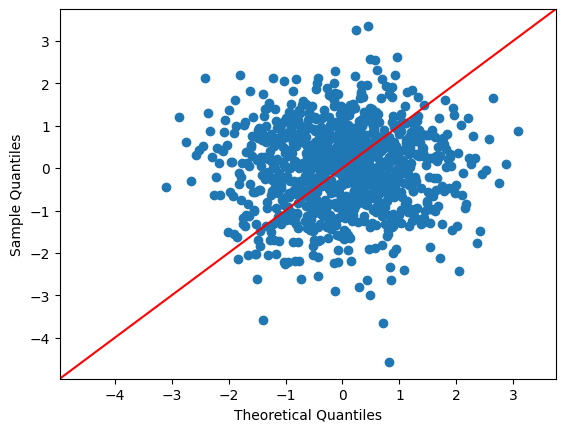

In [ ]:
error = nn_predict_test - y_test_sc
error_std = (error - np.mean(error))/np.std(error)

sm.qqplot(error_std, line='45')